In [1]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier, plot_importance

data = pd.read_csv('../input/xAPI-Edu-Data.csv')

**Dataset**

In [2]:
len(data)

480

In [3]:
data.head(4)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L


In [4]:
data.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

Attributes
1 Gender - student's gender (nominal: 'Male' or 'Female’)

2 Nationality- student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

3 Place of birth- student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

4 Educational Stages- educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)

5 Grade Levels- grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)

6 Section ID- classroom student belongs (nominal:’A’,’B’,’C’)

7 Topic- course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)

8 Semester- school year semester (nominal:’ First’,’ Second’)

9 Parent responsible for student (nominal:’mom’,’father’)

10 Raised hand- how many times the student raises his/her hand on classroom (numeric:0-100)

11- Visited resources- how many times the student visits a course content(numeric:0-100)

12 Viewing announcements-how many times the student checks the new announcements(numeric:0-100)

13 Discussion groups- how many times the student participate on discussion groups (numeric:0-100)

14 Parent Answering Survey- parent answered the surveys which are provided from school or not (nominal:’Yes’,’No’)

15 Parent School Satisfaction- the Degree of parent satisfaction from school(nominal:’Yes’,’No’)

16 Student Absence Days-the number of absence days for each student (nominal: above-7, under-7)

**Exploratory data analysis**

In [5]:
data['gender'].value_counts()

M    305
F    175
Name: gender, dtype: int64

**Gender Percentage In Dataset**

Percentage M    0.635417
F    0.364583
Name: gender, dtype: float64


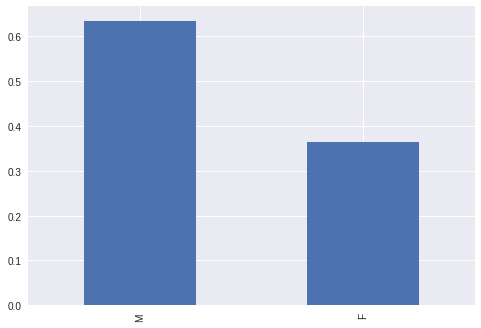

In [6]:
print('Percentage',data.gender.value_counts(normalize=True))
data.gender.value_counts(normalize=True).plot(kind='bar')

In [7]:
data['PlaceofBirth'].value_counts()

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
USA             16
SaudiArabia     16
Palestine       10
Tunis            9
Egypt            9
Lybia            6
Syria            6
Iran             6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64

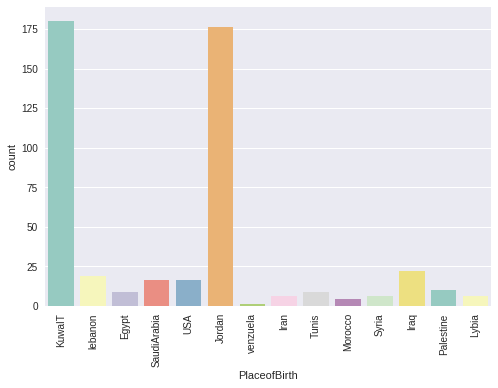

In [8]:
nationality = sns.countplot(x = 'PlaceofBirth', data=data, palette='Set3')
nationality.set(xlabel='PlaceofBirth',ylabel='count', label= "Students Birth Place")
plt.setp(nationality.get_xticklabels(), rotation=90)
plt.show()

In [9]:
pd.crosstab(data['Class'],data['Topic'])

Topic,Arabic,Biology,Chemistry,English,French,Geology,History,IT,Math,Quran,Science,Spanish
Class,,,,,,,,,,,,
H,19,16,10,17,20,6,4,15,6,8,16,5
L,17,4,8,10,16,0,3,38,7,6,10,8
M,23,10,6,18,29,18,12,42,8,8,25,12


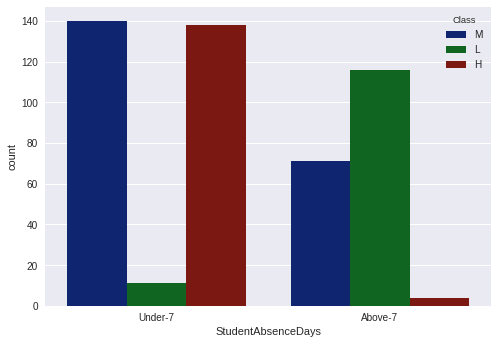

In [10]:
sns.countplot(x='StudentAbsenceDays',data = data, hue='Class',palette='dark')
plt.show()


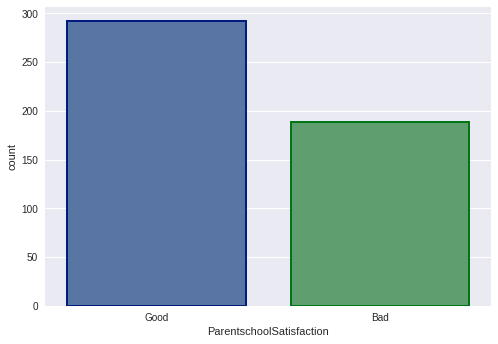

In [11]:
P_Satis = sns.countplot(x="ParentschoolSatisfaction",data=data,linewidth=2,edgecolor=sns.color_palette("dark"))

**Gender Comparison With Parents Relationship **

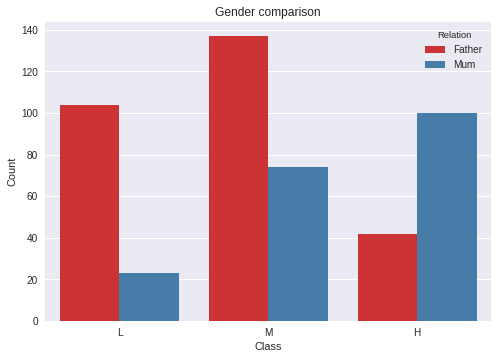

In [12]:
# gender comparison Relationship with Pare
plot = sns.countplot(x='Class', hue='Relation', data=data, order=['L', 'M', 'H'], palette='Set1')
plot.set(xlabel='Class', ylabel='Count', title='Gender comparison')
plt.show()

#educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)

**Pairplot**

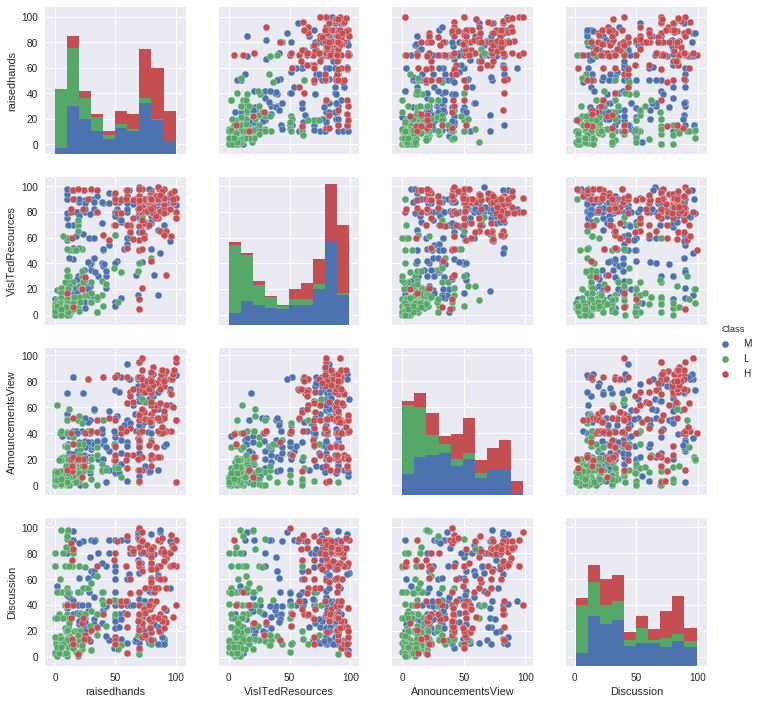

In [13]:
sns.pairplot(data,hue='Class')

In [14]:
#Graph Analysis Gender vs Place of Birth

Name: 
Type: Graph
Number of nodes: 16
Number of edges: 26
Average degree:   3.2500


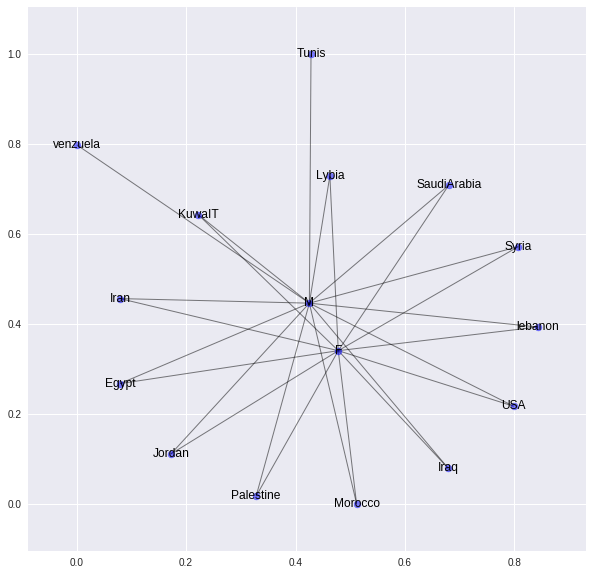

In [15]:
import networkx as nx

g= nx.Graph()
g = nx.from_pandas_dataframe(data,source='gender',target='PlaceofBirth')
print (nx.info(g))


plt.figure(figsize=(10,10)) 
nx.draw_networkx(g,with_labels=True,node_size=50, alpha=0.5, node_color="blue")
plt.show()

**Machine Learning Methods**

In [16]:
data.dtypes


gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

**Label Encoding**

In [17]:
Features = data.drop('Class',axis=1)
Target = data['Class']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])
    


**Test and Train Data Split**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=52)

**Logistic Regression Model**

In [19]:
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
Prediction = Logit_Model.predict(X_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)



In [21]:
print(Prediction)

['L' 'M' 'L' 'L' 'M' 'L' 'M' 'H' 'M' 'M' 'M' 'L' 'M' 'L' 'M' 'L' 'H' 'M'
 'H' 'M' 'H' 'H' 'L' 'L' 'H' 'L' 'M' 'H' 'H' 'L' 'M' 'H' 'L' 'M' 'M' 'L'
 'L' 'H' 'H' 'L' 'M' 'M' 'H' 'M' 'H' 'L' 'M' 'L' 'M' 'L' 'H' 'H' 'M' 'M'
 'H' 'L' 'H' 'L' 'L' 'M' 'L' 'H' 'M' 'M' 'H' 'M' 'L' 'L' 'H' 'M' 'M' 'H'
 'H' 'H' 'H' 'H' 'M' 'H' 'H' 'H' 'L' 'H' 'M' 'M' 'L' 'M' 'M' 'H' 'M' 'M'
 'L' 'M' 'M' 'H' 'M' 'H']


In [22]:
print(Score)

0.802083333333


In [23]:
print(Report)

             precision    recall  f1-score   support

          H       0.84      0.77      0.81        35
          L       0.78      0.95      0.86        22
          M       0.78      0.74      0.76        39

avg / total       0.80      0.80      0.80        96



**XGBoost**

In [24]:
xgb = XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=100,seed=10)
xgb_pred = xgb.fit(X_train, y_train).predict(X_test)


In [25]:
print (classification_report(y_test,xgb_pred))

             precision    recall  f1-score   support

          H       0.88      0.80      0.84        35
          L       0.85      1.00      0.92        22
          M       0.82      0.79      0.81        39

avg / total       0.84      0.84      0.84        96



In [26]:
print(accuracy_score(y_test,xgb_pred))

0.84375


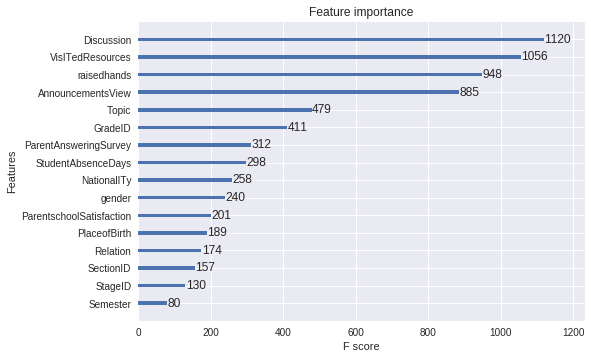

In [27]:
plot_importance(xgb)